# Aktienanalyse für Zwei Aktien im Vergleich zum S&P500 mit Sharp Ratio

Quelle: https://projects.datacamp.com/projects/66

und https://medium.com/automated-trading/obtain-40-technical-indicators-for-a-stock-using-python-247b32e85f30

für den Datenimport





1.   Daten Importieren mit Yahoo Finance
2.   Dataframes in Form bringen für die Verarbeitung
3.   Sharp-Ratio und Returns berechnen und Visualisieren





aktien und kürzel, können leicht verändert oder erweitert werden: 
 
*   msft
*   shop (shopify)
*   cloudflare
*   crowdstrike
*   twlo - twilio
*   lha - lufthansa
*   sae - shopapotheke europe
*   crwd - crowdstrike
*   net - cloudflare
*   pypl - paypal 
*   pd - pagerduty
*   bntx - biontech

* ^GSPC - S&P500
* ^IXIC - Nasdac
* ^EMCLOUD - Bessemer Cloud Index




In [1]:
!pip install yfinance # Bibliotheken, die gebraucht werden installieren

     |████████████████████████████████| 5.5MB 7.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=20ff018e33dd2c7a6cc1f7b811fc2c94979e626e0b607e47cd3ef58160f9d663
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
!pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp36-none-any.whl size=28718 sha256=e9e7c8e1b6b8ad32f31bcd94a0e54fb9c7ac459122dba22067529e1daa901303
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [5]:
import yfinance as yf
import pandas as pd

In [6]:
from ta import add_all_ta_features

In [7]:
from ta.utils import dropna

In [8]:
import matplotlib.pyplot as plt #zur späteren Darstellung der Grafiken
%matplotlib inline

In [10]:
tick = yf.Ticker(str('btc-usd')) #test für bitcoin-usd data
hist_data = tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)
hist_data.head() # Observe the historical stock data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


In [12]:
mom_data = add_all_ta_features(hist_data, open="Open", high="High", low="Low", close="Close", volume="Volume") # Substantiate data with momentum indicators
mom_data.columns

#Viel Mehr Spalten werden Importiert, eventuell für eine Spätere erweitert Analyse brauchbar, hier kannst für Machine learning die Daten erweitern, zb logistische Regressionsrechnung

/usr/local/lib/python3.6/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 't

In [13]:
hist_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-14,19144.492188,19305.099609,19012.708984,19246.644531,22473997681,0,0,2.258858e+12,1590952833109,0.203962,1.462385e+12,30.523042,131.364644,72.784286,5.808692e+08,389.514078,18840.051999,750.888601,18637.187891,20044.557728,17229.818053,15.102813,0.716523,0.0,0.0,18745.917057,19376.525456,18115.308659,6.727955,0.897019,0.0,0.0,16351.035156,19845.974609,18098.504883,18.752504,0.828515,4.380144,536.419285,662.501916,...,0.038085,0.554660,25.089718,72.556732,808.210547,130.721721,174.461137,-43.739415,18515.680664,18098.504883,18307.092773,16334.178711,16183.810303,14417.130371,44.0,32.0,12.0,17708.590859,NaN,0.0,0.0,0.342997,59.677460,0.572463,0.419041,0.247319,16.916296,59.112284,73.081255,65.300330,-26.918745,568.540456,18569.143862,0.237240,-10.704269,-6.071670,-4.632598,0.544664,0.543186,4108.443699
2020-12-15,19246.919922,19525.007812,19079.841797,19417.076172,26741982541,0,0,2.272633e+12,1617694815650,0.271610,1.904570e+12,39.131863,238.914421,63.496089,3.592117e+08,389.514078,18854.927013,720.316343,18671.435645,20119.137585,17223.733704,15.507130,0.757526,0.0,0.0,18783.152148,19401.251562,18165.052734,6.581424,1.012801,1.0,0.0,16351.035156,19845.974609,18098.504883,18.718108,0.877280,4.234571,549.163690,639.834271,...,0.047665,0.528076,24.801709,85.633970,28.329980,119.406572,163.404451,-43.997878,18572.270508,18098.504883,18335.387695,16334.178711,16225.072021,14417.130371,40.0,28.0,12.0,17794.086209,NaN,0.0,0.0,0.171498,60.878623,0.651495,0.541510,0.396257,17.525176,68.931403,92.339938,77.939854,-7.660062,669.186411,18579.868944,-0.145650,-10.467941,-6.950924,-3.517017,0.885514,0.881616,4145.710037
2020-12-16,19418.818359,21458.908203,19298.316406,21310.597656,44409011479,0,0,2.310945e+12,1662103827129,0.373144,1.364526e+13,49.959115,5235.878501,484.455369,4.567498e+09,389.514078,19046.765733,864.343888,18879.434375,20568.590393,17190.278357,17.894138,1.219638,1.0,0.0,18930.962370,19715.860417,18146.064323,8.292215,2.015888,1.0,0.0,16526.423828,21458.908203,18992.666016,26.126230,0.969932,4.194882,703.940494,652.655516,...,0.299137,0.527213,24.972643,219.869325,274.796094,121.110086,152.976829,-31.866742,19539.220703,18904.971680,19222.096191,17140.645508,16475.901855,14606.769043,100.0,24.0,76.0,17876.161745,NaN,0.0,0.0,11.425157,71.158301,1.000000,0.741319,0.567290,21.735242,73.624647,96.137117,87.186103,-3.862883,1024.971280,18827.366649,13.961844,-5.423267,-6.645393,1.222126,9.751836,9.305160,4559.744730
2020-12-17,21308.351562,23642.660156,21234.675781,22805.162109,71378606374,0,0,2.332673e+12,1733482433503,0.371985,2.693593e+13,55.661712,6949.675964,920.983381,9.336651e+09,389.514078,19591.251064,1018.707937,19164.272363,21396.686772,16931.857954,23.297669,1.315460,1.0,0.0,19269.225586,2024

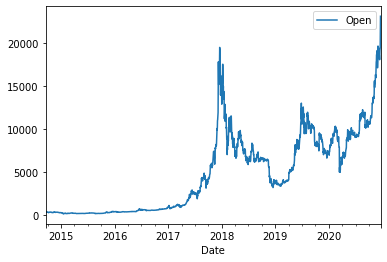

In [14]:
hist_data.plot(y='Open')

# Sharp Ratio Calculation

In [23]:
#ich hab für jeden stock von oben einen dataframe gebaut. der df3 ist der referenzindex (hier der nasdaq), das ist später beim rechnen wichtig. 

df1_tick = yf.Ticker(str('crwd'))
df1_hist_data = df1_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


df2_tick = yf.Ticker(str('net'))
df2_hist_data = df2_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


df3_tick = yf.Ticker(str('^IXIC'))
df3_hist_data = df3_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)

df4_tick = yf.Ticker(str('twlo'))
df4_hist_data = df4_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)

df5_tick = yf.Ticker(str('lha'))
df5_hist_data = df5_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


df6_tick = yf.Ticker(str('sae'))
df6_hist_data = df6_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)

df7_tick = yf.Ticker(str('pypl'))
df7_hist_data = df7_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


df8_tick = yf.Ticker(str('pd'))
df8_hist_data = df8_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


df9_tick = yf.Ticker(str('shop'))
df9_hist_data = df9_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


df10_tick = yf.Ticker(str('msft'))
df10_hist_data = df10_tick.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)


In [25]:
df2 = df2_hist_data['Close']
df1 = df1_hist_data['Close']

df4 = df4_hist_data['Close']
df5 = df5_hist_data['Close']
df6 = df6_hist_data['Close']
df7 = df7_hist_data['Close']
df8 = df8_hist_data['Close']
df9 = df9_hist_data['Close']
df10 = df10_hist_data['Close']

df4

Date
2016-06-23     28.790001
2016-06-24     26.299999
2016-06-27     27.250000
2016-06-28     29.920000
2016-06-29     37.080002
                 ...    
2020-12-11    342.410004
2020-12-14    350.089996
2020-12-15    345.100006
2020-12-16    350.880005
2020-12-17    361.070007
Name: Close, Length: 1131, dtype: float64

In [18]:


df1.describe()

count    385.000000
mean      86.724260
std       34.235892
min       33.009998
25%       58.770000
50%       75.980003
75%      107.099998
max      185.250000
Name: Close, dtype: float64

In [26]:
result = pd.concat([df1, df2, df4, df5, df6, df7, df8, df9, df10], axis=1, join='outer') #alles in einen dataframe joinen

In [30]:
result.head() #nicht schrecken, nur msft hat so lange historische daten

,NET,CRWD,twlo,lha,sae,paypal,pd,shop,msft
Date,,,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061893
1986-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064103
1986-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065209
1986-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063551
1986-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062446


In [29]:
result.columns = ['NET', 'CRWD', 'twlo', 'lha' , 'sae', 'paypal', 'pd', 'shop' , 'msft' ] #umbenennen, reihenfolge wichtig

In [22]:
result.head()

,NET,CRWD,twlo,lha,sae,paypal,pd,shop,msft
Date,,,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061893
1986-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064103
1986-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065209
1986-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063551
1986-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062446


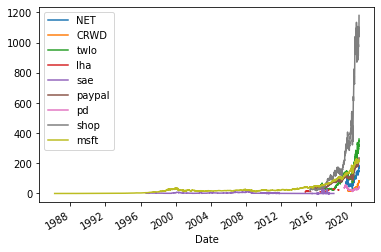

In [31]:
result.plot() #kurse aufzeichnen

In [32]:
stock_data = result

In [33]:
benchmark_data = df1 = df3_hist_data['Close']

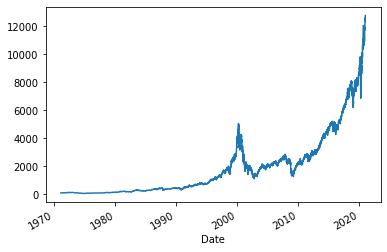

In [34]:
benchmark_data.plot()

,NET,CRWD,twlo,lha,sae,paypal,pd,shop,msft
count,384.000000,319.000000,1130.000000,3266.000000,6132.000000,1375.000000,426.000000,1406.000000,8764.000000
mean,0.004017,0.005602,0.002986,0.000228,0.301540,0.001585,0.001376,0.003652,0.001165
std,0.044722,0.041591,0.039279,0.018834,8.104554,0.021609,0.044729,0.036236,0.021503
min,-0.165360,-0.164743,-0.263111,-0.195329,-0.997000,-0.158239,-0.257788,-0.175518,-0.301158
25%,-0.022234,-0.019078,-0.014621,0.000000,0.000000,-0.008609,-0.020891,-0.014191,-0.009217
50%,0.003209,0.004199,0.002741,0.000000,0.000000,0.001391,0.001515,0.003321,0.000356
75%,0.025776,0.027259,0.019710,0.000000,0.000000,0.012389,0.021244,0.021029,0.011336
max,0.174173,0.229989,0.396160,0.734444,351.941173,0.141098,0.262052,0.510588,0.195652


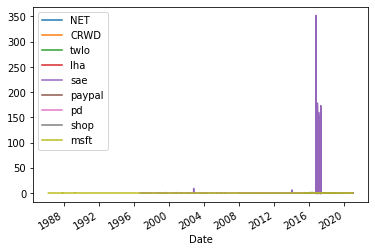

In [35]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

stock_returns.plot()

stock_returns.describe()

Date
1971-02-05         NaN
1971-02-08    0.008400
1971-02-09   -0.000793
1971-02-10   -0.000695
1971-02-11    0.007548
Name: Close, dtype: float64

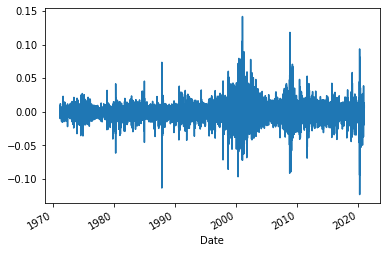

In [36]:
# calculate daily benchmark_data returns
# ... YOUR CODE FOR TASK 6 HERE ...
sp_returns = benchmark_data.pct_change()

# plot the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...

sp_returns.plot()
# summarize the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...

#sp_returns.describe()
sp_returns.dropna()
sp_returns.head()

,NET,CRWD,twlo,lha,sae,paypal,pd,shop,msft
count,384.000000,319.000000,1130.000000,3266.000000,6132.000000,1375.000000,426.000000,1406.000000,8764.000000
mean,0.002550,0.004000,0.002045,-0.000353,0.301021,0.000811,0.000094,0.002906,0.000661
std,0.040180,0.038737,0.035132,0.023540,8.104623,0.014801,0.039261,0.031591,0.015932
min,-0.123463,-0.126209,-0.259367,-0.202181,-1.004364,-0.077650,-0.208160,-0.121014,-0.187696
25%,-0.021084,-0.017619,-0.014519,-0.007538,-0.011908,-0.006715,-0.020062,-0.012615,-0.006957
50%,0.000238,0.000998,0.000466,-0.001037,-0.001383,0.000294,0.000932,0.002184,-0.000024
75%,0.022127,0.023157,0.016417,0.005233,0.010701,0.007683,0.017654,0.016978,0.007471
max,0.212081,0.204400,0.382012,0.735725,351.956539,0.125982,0.255019,0.506832,0.150724


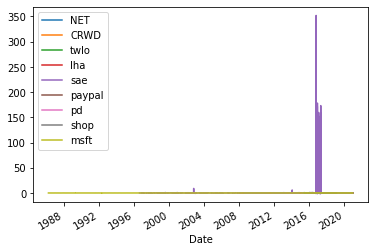

In [37]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
# ... YOUR CODE FOR TASK 7 HERE ...
excess_returns.plot()

# summarize the excess_returns
# ... YOUR CODE FOR TASK 7 HERE ...

excess_returns.describe()


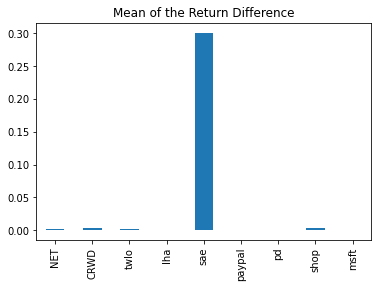

In [38]:
# calculate the mean of excess_returns 
# ... YOUR CODE FOR TASK 8 HERE ...
avg_excess_return = excess_returns.mean()

#avg_excess_returns.head()
# plot avg_excess_returns
# ... YOUR CODE FOR TASK 8 HERE ...

avg_excess_return.plot.bar(title='Mean of the Return Difference')


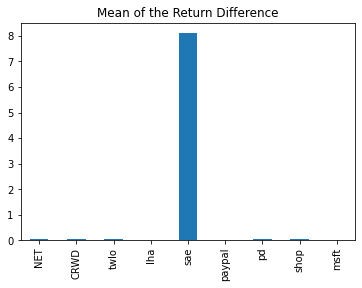

In [39]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
# ... YOUR CODE FOR TASK 9 HERE ...

sd_excess_return.plot.bar(title='Mean of the Return Difference')

In [40]:
import numpy as np

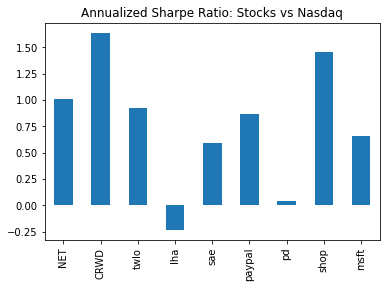

In [41]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
daily_sharpe_ratio.head()

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
# ... YOUR CODE FOR TASK 10 HERE ...

annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs Nasdaq')